In [1]:
#Importing necessary Libraries
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#Loading the dataset
data = pd.read_excel("exp_vs_sal.xlsx")

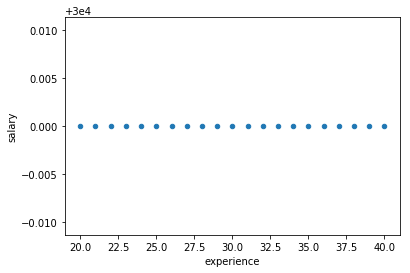

In [3]:
#Plotting the Dataset
data.plot(kind = 'scatter', x = 'experience', y = 'salary')

In [4]:
#Splitting the dataset into  training and testing dataset
train, test = train_test_split(data,  test_size = 0.2)

In [13]:
#Converting training data into tensors for Pytorch
X_train = torch.Tensor([[x] for x in list(train.experience)])
y_train = torch.torch.FloatTensor([[x] for x in list(train.salary)])
#Converting test data into tensors for Pytorch
X_test = torch.Tensor([[x] for x in list(test.experience)])
y_test = torch.torch.FloatTensor([[x] for x in list(test.salary)])

In [14]:
class LinearRegression(nn.Module):
    def __init__(self, in_size, out_size):
        super().__init__()
        self.lin = nn.Linear(in_features = in_size, out_features = out_size)
    def forward(self, X):
        pred = self.lin(X)
        return(pred)

In [15]:
#A method for getting the parameter values from the tensor object
def get_parameters():
    return(w[0][0].item(), b[0].item())

In [16]:
#A method for plotting the regressor
def plot_model(name):
    plt.title(name)
    plt.xlabel('Experience')
    plt.ylabel('Salary')
    w1, b1 = get_parameters()
    X1 = np.array([-15, 15])
    Y1 = w1 * X1 + b1
    plt.plot(X1, Y1, 'g')
    plt.scatter(X_train,y_train)
    plt.show()

In [21]:
# Setting the seed or random_state for reproducibility
torch.manual_seed(1)

In [22]:
#Initializing the Linear model
model = LinearRegression(1 , 1)

In [23]:
#Printing the initial model parameters
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [24]:
#Unpacking the parameters
[w,b] = model.parameters()

In [25]:
w

Parameter containing:
tensor([[0.5153]], requires_grad=True)

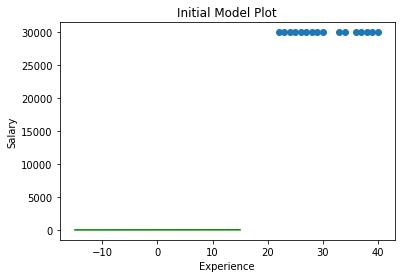

In [26]:
#Plotting the regression with initial weight and bias
plot_model("Initial Model Plot")

In [27]:
#Initializing the loss function as Mean Squared Error
loss_fun = nn.MSELoss()
#Initializing the optimizer as Stochastic Gradient Descent with the model parameters and  learning rate 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [28]:
# Training the model
epochs = 5 
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = loss_fun(y_pred, y_train)
    print("@epoch : ", i, " #Loss : ", loss.item())
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

@epoch :  0  #Loss :  899078016.0
@epoch :  1  #Loss :  298270261248.0
@epoch :  2  #Loss :  102547738066944.0
@epoch :  3  #Loss :  3.5260461729447936e+16
@epoch :  4  #Loss :  1.2124115707881325e+19


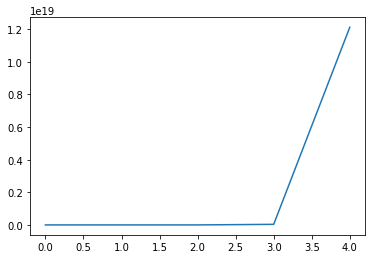

In [29]:
#Visualizing the loss curve
plt.plot(range(epochs), losses)

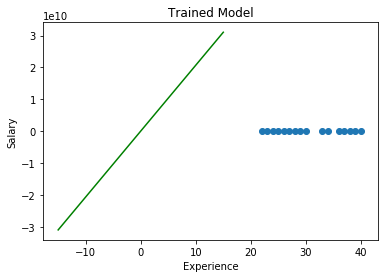

In [30]:
#Visualizing the trained regressor
plot_model("Trained Model")

In [31]:
#Predicting for X_test
y_pred_test = model.forward(X_test)

In [32]:
y_pred_test

tensor([[6.6128e+10],
        [4.1354e+10],
        [6.4064e+10],
        [4.3419e+10],
        [7.2322e+10]], grad_fn=<AddmmBackward>)

In [33]:
X_test

tensor([[32.],
        [20.],
        [31.],
        [21.],
        [35.]])

In [34]:
#Converting predictions from tensor objects into a list

y_pred_test = [y_pred_test[x].item() for x in range(len(y_pred_test))]
# Comparing Actual and predicted values
df = {}
df['Actual Observation'] = y_test
df['Predicted Salary'] = y_pred_test
df = pd.DataFrame(df)
print(df)

  Actual Observation  Predicted Salary
0  (tensor(30000.),)      6.612826e+10
1  (tensor(30000.),)      4.135450e+10
2  (tensor(30000.),)      6.406378e+10
3  (tensor(30000.),)      4.341898e+10
4  (tensor(30000.),)      7.232170e+10


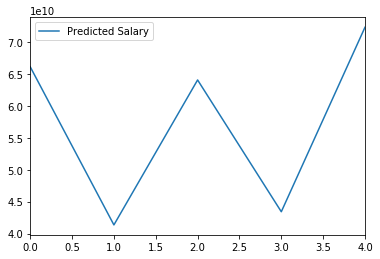

In [35]:
#Visualizing Actual and predicted values
df.plot()